# GMS 5204

# Lab 1 - Data Wrangling (CKD Data)

Workshop Instructions:

1. Read through the text descriptions at the top of the cell/code blocks
2. Run the code below by selecting the code block and pressing ``Ctrl + Enter``. Note: The preceding code blocks must be run before proceeding to the next block.
2. Think through the guiding questions and points that are raised for the step. What do you observe from the output and what do they mean?

In [1]:
!pip install ydata-profiling
!pip install --upgrade Pillow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 716.9 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.2 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=07ca561b9ea83507832bee28679280766f3be2a49a4ff95d0d23c09a10a53d9c
  Stored in directory: /root/.cache/pip/wheels/5f/d4/d7/4189b07b5902ee9f3ce0dbb14909fbe8037c39d6c63ffd49c9
Successfully built htmlmin
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.1
    Uninstalling scipy-1.16.1:
     

In [2]:
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport
import os as os

# Chronic Kidney Disease Dataset

The datasets in this notebook can be obtained from the **UCI Machine Learning Repository**

1. Chronic Kidney Disease Dataset: https://archive.ics.uci.edu/ml/datasets/chronic_kidney_disease

**References**:

1. Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

# 1. Read in datasets

In [3]:
# You can only read through the link to the raw file in Github
url='https://raw.githubusercontent.com/seanlam74/GMS5203-Lab/main/chronic_kidney_disease_full_unclean.csv'
ckd = pd.read_csv(url)

# 2. Data Wrangling and Exploration

The first step in any data analysis process is inspecting the dataset itself and familiarizing with the data format and presentation. Use the `.head()`, `.column()`, `.info()`, `.describe()` etc methods on the DataFrames to have a look at the values in the columns and how they are presented.

Key Considerations:

- Are there any missing values? How do you want to treat cases with these values?
- Are there duplicated rows?
- Is the data in a tidy format?
- Which is your target variable, or variable that you are interesting in predicting?
- Are there any outliers? What are the descriptives for each column?
- Need to rescale, recode categorical, aggregate, etc?
- Is the dataset balanced i.e. equal proportions of examples from each class label?

FIELDS:

* bp		-	blood pressure
* sg		-	specific gravity
* al		- albumin
* su		-	sugar
*	rbc		-	red blood cells
*	pc		-	pus cell
*	pcc		-	pus cell clumps
*	ba		-	bacteria
*	bgr		-	blood glucose random
*	bu		-	blood urea
*	sc		-	serum creatinine
*	sod		-	sodium
*	pot		-	potassium
*	hemo	-	hemoglobin
*	pcv		-	packed cell volume
*	wc		-	white blood cell count
*	rc		-	red blood cell count
*	htn		-	hypertension
*	dm		-	diabetes mellitus
*	cad		-	coronary artery disease
*	appet	-	appetite
*	pe		-	pedal edema
*	ane		-	anemia
* class	-	class (TARGET VARIABLE; CKD vs No-CKD)



In [4]:
ckd.head(10)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.02,1,0,?,normal,notpresent,notpresent,121,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.02,4,0,?,normal,notpresent,notpresent,?,...,38,6000,?,no,no,no,good,no,no,ckd
2,62,80,1.01,2,3,normal,normal,notpresent,notpresent,423,...,31,7500,?,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.01,2,0,normal,normal,notpresent,notpresent,106,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,60,90,1.015,3,0,?,?,notpresent,notpresent,74,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,68,70,1.01,0,0,?,normal,notpresent,notpresent,100,...,36,?,?,no,no,no,good,no,no,ckd
7,24,?,1.015,2,4,normal,abnormal,notpresent,notpresent,410,...,44,6900,5,no,yes,no,good,yes,no,ckd
8,52,100,1.015,3,0,normal,abnormal,present,notpresent,138,...,33,9600,4,yes,yes,no,good,no,yes,ckd
9,53,90,1.02,2,0,abnormal,abnormal,present,notpresent,70,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


In [5]:
ckd.describe()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
count,408,408,408,408,408,408,408,408,408,408,...,408,408,408,408,408,408,408,408,408,408
unique,77,11,6,7,7,3,3,3,3,147,...,43,90,46,3,3,3,3,3,3,2
top,60,80,1.02,0,0,normal,normal,notpresent,notpresent,?,...,?,?,?,no,no,no,good,no,no,ckd
freq,19,122,110,207,298,209,267,362,382,44,...,71,106,131,259,269,372,325,331,347,250


## 2.1 Check and Remove rows that are complete duplicates

In [6]:
ckd[ckd.duplicated(subset=None)].sort_values(by=['age'])

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
401,12,80,1.02,0,0,normal,normal,notpresent,notpresent,100,...,49,6600,5.4,no,no,no,good,no,no,notckd
402,17,60,1.025,0,0,normal,normal,notpresent,notpresent,114,...,51,7200,5.9,no,no,no,good,no,no,notckd
404,36,80,1.025,0,0,normal,normal,notpresent,notpresent,85,...,44,5800,6.3,no,no,no,good,no,no,notckd
406,43,60,1.025,0,0,normal,normal,notpresent,notpresent,117,...,54,7400,5.4,no,no,no,good,no,no,notckd
407,50,80,1.02,0,0,normal,normal,notpresent,notpresent,137,...,45,9500,4.6,no,no,no,good,no,no,notckd
403,52,80,1.025,0,0,normal,normal,notpresent,notpresent,99,...,52,6300,5.3,no,no,no,good,no,no,notckd
400,57,80,1.02,0,0,normal,normal,notpresent,notpresent,133,...,46,6600,5.5,no,no,no,good,no,no,notckd
405,57,80,1.02,0,0,normal,normal,notpresent,notpresent,133,...,46,6600,5.5,no,no,no,good,no,no,notckd


In [7]:
ckd.drop_duplicates(inplace=True)

In [8]:
ckd[ckd.duplicated(subset=None)].sort_values(by=['age'])

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class


In [9]:
file = ProfileReport(ckd)
file.to_file(output_file='output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 25/25 [00:00<00:00, 36.65it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
ckd['age'].unique()

array(['48', '7', '62', '51', '60', '68', '24', '52', '53', '50', '63',
       '40', '47', '61', '21', '42', '75', '69', '?', '73', '70', '65',
       '76', '72', '82', '46', '45', '35', '54', '11', '59', '67', '15',
       '55', '44', '26', '64', '56', '5', '74', '38', '58', '71', '34',
       '17', '12', '43', '41', '57', '8', '39', '66', '81', '14', '27',
       '83', '30', '4', '3', '6', '32', '80', '49', '90', '78', '19', '2',
       '33', '36', '37', '23', '25', '20', '29', '28', '22', '79'],
      dtype=object)

## 2.2 Check Data Types and Handle Missing Values

Missing values are common in healthcare datasets, where certain entries are missing or are not recorded for various reasons e.g. test was not done. These values can present themselves in the raw dataset in various ways: NA, NIL, ?, None...

As in many areas of analytics, there are multiple ways to deal with missing data

### 2.2.1 Replace with 'NaN' value

You can choose to replace these values with an `NaN` value, which is used by both Pandas and Numpy packages or a string value such as 'NA'. However, note that replacing numeric columns with a string will cause errors and incompatibility fitting these values into machine learning models since it changes the data format and type.

In this example, we will change the missing values: '?' to a `NaN` value.

In [11]:
ckd.replace('?',np.nan,inplace=True)

### 2.2.2 Further Data Understanding

You should seek to understand the data types of each column and there missingness. Decisions made now on how to deal with these will affect any analytical computations downstream

In [12]:
profile = ProfileReport(ckd)

profile.to_file(output_file='output_corrected.html')

#if using google colab, change to correct path
#profile.to_file('/content/drive/My Drive/output_corrected.html')

# Note that numeric and categorical columns are detected differently now. We have now identified the data types of the columns using the Data Profiler (13 numeric, 7 categorical and 5 boolean)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 25/25 [00:00<00:00, 43.68it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [13]:
ckd.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.02,1,0,NaN,normal,notpresent,notpresent,121,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.02,4,0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62,80,1.01,2,3,normal,normal,notpresent,notpresent,423,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.01,2,0,normal,normal,notpresent,notpresent,106,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [14]:
# based on insights from the Data Profiler, we hypothesize the data types for each columns are as follows
categorical_cols = ['rbc','pc','pcc','ba','appet']
boolean_cols=['htn','dm','cad','pe','ane']
numeric_cols = ['age','bp','sg','al','su','bgr','bu','sc','sod','pot','hemo','pcv','wbcc','rbcc']

In [15]:
# Confirm the categories in each of the categorical and boolean cols
print('rbc - categorical')
print(ckd['rbc'].value_counts())
print('pc - categorical')
print(ckd['pc'].value_counts())
print('pcc - categorical')
print(ckd['pcc'].value_counts())
print('ba - categorical')
print(ckd['ba'].value_counts())
print('appet - categorical')
print(ckd['appet'].value_counts())

rbc - categorical
rbc
normal      201
abnormal     47
Name: count, dtype: int64
pc - categorical
pc
normal      259
abnormal     76
Name: count, dtype: int64
pcc - categorical
pcc
notpresent    354
present        42
Name: count, dtype: int64
ba - categorical
ba
notpresent    374
present        22
Name: count, dtype: int64
appet - categorical
appet
good    317
poor     82
Name: count, dtype: int64


In [16]:
print('htn - boolean')
print(ckd['htn'].value_counts())
print('dm - boolean')
print(ckd['dm'].value_counts())
print('cad - boolean')
print(ckd['cad'].value_counts())
print('pe - boolean')
print(ckd['pe'].value_counts())
print('ane - boolean')
print(ckd['ane'].value_counts())

htn - boolean
htn
no     251
yes    147
Name: count, dtype: int64
dm - boolean
dm
no     261
yes    137
Name: count, dtype: int64
cad - boolean
cad
no     364
yes     34
Name: count, dtype: int64
pe - boolean
pe
no     323
yes     76
Name: count, dtype: int64
ane - boolean
ane
no     339
yes     60
Name: count, dtype: int64


In [17]:
ckd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     391 non-null    object
 1   bp      388 non-null    object
 2   sg      353 non-null    object
 3   al      354 non-null    object
 4   su      351 non-null    object
 5   rbc     248 non-null    object
 6   pc      335 non-null    object
 7   pcc     396 non-null    object
 8   ba      396 non-null    object
 9   bgr     356 non-null    object
 10  bu      381 non-null    object
 11  sc      383 non-null    object
 12  sod     313 non-null    object
 13  pot     312 non-null    object
 14  hemo    348 non-null    object
 15  pcv     329 non-null    object
 16  wbcc    294 non-null    object
 17  rbcc    269 non-null    object
 18  htn     398 non-null    object
 19  dm      398 non-null    object
 20  cad     398 non-null    object
 21  appet   399 non-null    object
 22  pe      399 non-null    object


In [18]:
# As all the columns are of string types, we need to change them to the correct data types
ckd[numeric_cols]=ckd[numeric_cols].astype('float')
ckd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   sg      353 non-null    float64
 3   al      354 non-null    float64
 4   su      351 non-null    float64
 5   rbc     248 non-null    object 
 6   pc      335 non-null    object 
 7   pcc     396 non-null    object 
 8   ba      396 non-null    object 
 9   bgr     356 non-null    float64
 10  bu      381 non-null    float64
 11  sc      383 non-null    float64
 12  sod     313 non-null    float64
 13  pot     312 non-null    float64
 14  hemo    348 non-null    float64
 15  pcv     329 non-null    float64
 16  wbcc    294 non-null    float64
 17  rbcc    269 non-null    float64
 18  htn     398 non-null    object 
 19  dm      398 non-null    object 
 20  cad     398 non-null    object 
 21  appet   399 non-null    object 
 22  pe     

In [19]:
ckd['bgr'].mean()

np.float64(148.0365168539326)

In [20]:
ckd['bgr_na']=ckd['bgr'].copy()

In [21]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(ckd[numeric_cols])
ckd[numeric_cols] = imp.transform(ckd[numeric_cols])
ckd[numeric_cols] = ckd[numeric_cols].astype(np.float32)

In [22]:
ckd[ckd['bgr_na'].isna()].head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class,bgr_na
1,7.0,50.0,1.020000,4.000000,0.000000,NaN,normal,notpresent,notpresent,148.036514,...,6000.00000,4.707435,no,no,no,good,no,no,ckd,NaN
21,60.0,90.0,1.017408,1.016949,0.450142,NaN,NaN,notpresent,notpresent,148.036514,...,6200.00000,3.600000,yes,yes,yes,good,no,no,ckd,NaN
23,21.0,70.0,1.010000,0.000000,0.000000,NaN,normal,notpresent,notpresent,148.036514,...,8406.12207,4.707435,no,no,no,poor,no,yes,ckd,NaN
24,42.0,100.0,1.015000,4.000000,0.000000,normal,abnormal,notpresent,present,148.036514,...,8300.00000,4.600000,yes,no,no,poor,no,no,ckd,NaN
29,68.0,70.0,1.005000,1.000000,0.000000,abnormal,abnormal,present,notpresent,148.036514,...,8406.12207,4.707435,no,no,yes,good,no,no,ckd,NaN


In [23]:
ckd.drop(['bgr_na'],axis=1,inplace=True)

Notice how the missing values have been replaced by mean values of the entire column. There are many other methods available for imputation, such as Multi-Variate Imputation (MICE), K-Nearest Neighbours that can be used.

In [24]:
ckd[numeric_cols].describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,51.483379,76.469070,1.017408,1.016949,0.450142,148.036530,57.425724,3.072454,137.528748,4.627244,12.526436,38.884499,8406.122070,4.707435
std,16.974966,13.476296,0.005369,1.272317,1.029488,74.782631,49.285881,5.617489,9.204275,2.819785,2.716172,8.151080,2523.220215,0.840314
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,1.015000,0.000000,0.000000,101.000000,27.000000,0.900000,135.000000,4.000000,10.875000,34.000000,6975.000000,4.500000
50%,54.000000,78.234535,1.017408,1.000000,0.000000,126.000000,44.000000,1.400000,137.528748,4.627244,12.526437,38.884499,8406.122070,4.707435
75%,64.000000,80.000000,1.020000,2.000000,0.450142,150.000000,61.750000,3.072454,141.000000,4.800000,14.625000,44.000000,9400.000000,5.100000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.799999,54.000000,26400.000000,8.000000


##  2.3 Recoding categorical and Boolean variables (e.g. One-Hot Encoding and Label Encoding)

Medical datasets often contain categorical variables, and may sometimes have a large number of categories. These variables can indicate the presence of certain conditions e.g. diabetes, hypertension, abnormal results. Before they can be used with certain machine learning models, they have to be transformed into suitable numeric representation, such as **one-hot encoding** or **label encoding**.

**Label Encoding**: Maps the $n$ categories of the variable into integer representations. This is a convenient way to convert the variable but may lead to misleading results, as the variable may be interpreted as a numeric variable instead.

**One-Hot Encoding**: Converts the $n$ categories of the variable in to $n$ new columns, each using a binary value to represent the $nth$ category. This is a common way of transforming categorical variables but may run into dimensionality issues when used with variables with a large number of categories.

In [25]:
# Label encoding for Boolean variables ('Yes' -> True; 'No' -> False)
ckd[boolean_cols] = np.where(ckd[boolean_cols] == 'Yes',True,False)
ckd[boolean_cols].info()

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   htn     400 non-null    bool 
 1   dm      400 non-null    bool 
 2   cad     400 non-null    bool 
 3   pe      400 non-null    bool 
 4   ane     400 non-null    bool 
dtypes: bool(5)
memory usage: 21.2 KB


In [26]:
# We can also encode Categorical columns using label encoding as well, but the labels are ambiguous e.g., rbc: {NaN:-1, 'abnormal':0, 'normal': 1}
ckd_cat_le=ckd.copy()
ckd_cat_le[categorical_cols]=ckd_cat_le[categorical_cols].astype('category')
for col in categorical_cols:
    ckd_cat_le[col] = ckd_cat_le[col].cat.codes
ckd_cat_le

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,-1,1,0,0,121.000000,...,44.0,7800.0,5.200000,False,False,False,0,False,False,ckd
1,7.0,50.0,1.020,4.0,0.0,-1,1,0,0,148.036514,...,38.0,6000.0,4.707435,False,False,False,0,False,False,ckd
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.000000,...,31.0,7500.0,4.707435,False,False,False,1,False,False,ckd
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.000000,...,32.0,6700.0,3.900000,False,False,False,1,False,False,ckd
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.000000,...,35.0,7300.0,4.600000,False,False,False,0,False,False,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,140.000000,...,47.0,6700.0,4.900000,False,False,False,0,False,False,notckd
396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,75.000000,...,54.0,7800.0,6.200000,False,False,False,0,False,False,notckd
397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,100.000000,...,49.0,6600.0,5.400000,False,False,False,0,False,False,notckd
398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,114.000000,...,51.0,7200.0,5.900000,False,False,False,0,False,False,notckd


In [ ]:
categorical_cols

['rbc', 'pc', 'pcc', 'ba', 'appet']

In [27]:
# One-hot encoding for Categorical variables. REmember to keep a dummy variable to indicate NaN
ckd_one_hot=ckd.copy()
for col in categorical_cols:
    one_hot = pd.get_dummies(ckd[col], dummy_na=True)
    # retain a column to indicate NaN
    one_hot.columns=one_hot.columns.fillna('NA')
    one_hot.columns = [col + '_' + a for a in one_hot.columns]
    one_hot.columns
    ckd_one_hot = ckd_one_hot.join(one_hot)
ckd_one_hot.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pc_NA,pcc_notpresent,pcc_present,pcc_NA,ba_notpresent,ba_present,ba_NA,appet_good,appet_poor,appet_NA
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.000000,...,False,True,False,False,True,False,False,True,False,False
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,148.036514,...,False,True,False,False,True,False,False,True,False,False
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.000000,...,False,True,False,False,True,False,False,False,True,False
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.000000,...,False,False,True,False,True,False,False,False,True,False
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.000000,...,False,True,False,False,True,False,False,True,False,False


In [28]:
ckd.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'class'],
      dtype='object')

In [29]:
ckd_one_hot.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'class', 'rbc_abnormal', 'rbc_normal', 'rbc_NA',
       'pc_abnormal', 'pc_normal', 'pc_NA', 'pcc_notpresent', 'pcc_present',
       'pcc_NA', 'ba_notpresent', 'ba_present', 'ba_NA', 'appet_good',
       'appet_poor', 'appet_NA'],
      dtype='object')

###  2.4 Recoding/ Rescaling continuous variables
1. Recoding age into categorical
2. Normalization of wbcc
3. Standardization of wbcc


In [30]:
# 1. Recoding age into categorical
# Sometimes needed to study risk factors across different age classes. Pre-elderly is unique class as many chronic diseases are detected in this category. Age classes can be an informative feature as well

def age_groups(series):
    if series < 19:
        return "Children"
    elif 20 <= series < 50:
        return "Adults"
    elif 49 <= series < 64:
        return "Pre-elderly"
    elif 65 <= series:
        return "Elderly"

ckd_one_hot['Age Group'] = ckd_one_hot['age'].apply(age_groups)
ckd_one_hot['Age Group'].value_counts(sort=False)

,count
Age Group,
Adults,137
Children,19
Pre-elderly,136
Elderly,98


In [31]:
ckd_one_hot['wbcc'].describe()

,wbcc
count,400.000000
mean,8406.122070
std,2523.220215
min,2200.000000
25%,6975.000000
50%,8406.122070
75%,9400.000000
max,26400.000000


In [32]:
# 2. Normalization
# wbcc has a min of 2200, max of 26400. Maybe good to consider standardizing this.
# Normalization can be used to transform the data within range of 0 to 1.
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

scaler = MinMaxScaler()
ckd_one_hot['wbcc_scaled_0_1'] = scaler.fit_transform(ckd_one_hot[['wbcc']])
print('MinMaxScaler:\n{}'.format(ckd_one_hot['wbcc_scaled_0_1'].describe()))


# There may be outliers in the original dataset and these may bias the rescaling
# Robust Scaler, which uses the IQR, can be used to normalize the dataset.
robustscaler = RobustScaler()
ckd_one_hot['wbcc_robust_scaler'] = robustscaler.fit_transform(ckd_one_hot[['wbcc']])
print('RobustScaler:\n{}'.format(ckd_one_hot['wbcc_robust_scaler'].describe()))

# However, sometimes domain knowledge may provide more useful norms
# The normal number of WBCs in the blood is 4,500 to 11,000 WBCs per microliter (4.5 to 11.0 × 109/L). (https://www.ucsfhealth.org/medical-tests/wbc-count) We can consider standardizing wbcc based on domain knowledge

ckd_one_hot['wbcc_domain_scaled'] = (ckd_one_hot['wbcc']-4500)/(11000-4500)
print('DomainScaler:\n{}'.format(ckd_one_hot['wbcc_domain_scaled'].describe()))


MinMaxScaler:
count    400.000000
mean       0.256451
std        0.104265
min        0.000000
25%        0.197314
50%        0.256451
75%        0.297521
max        1.000000
Name: wbcc_scaled_0_1, dtype: float64
RobustScaler:
count    4.000000e+02
mean     1.144409e-07
std      1.040503e+00
min     -2.559226e+00
25%     -5.901535e-01
50%      0.000000e+00
75%      4.098466e-01
max      7.420156e+00
Name: wbcc_robust_scaler, dtype: float64
DomainScaler:
count    400.000000
mean       0.600942
std        0.388188
min       -0.353846
25%        0.380769
50%        0.600942
75%        0.753846
max        3.369231
Name: wbcc_domain_scaled, dtype: float64


In [33]:
# 2. Standardization
# Transforms the features to a standard normal distribution with mean 0 and standard 1
std_scaler = StandardScaler()

ckd_one_hot['wbcc_z_scaled'] = std_scaler.fit_transform(ckd[['wbcc']])
print('Standard Scaler:\n{}'.format(ckd_one_hot['wbcc_z_scaled'].describe()))



Standard Scaler:
count    4.000000e+02
mean     9.536743e-09
std      1.001252e+00
min     -2.462685e+00
25%     -5.678913e-01
50%     -1.104418e-07
75%      3.943859e-01
max      7.140246e+00
Name: wbcc_z_scaled, dtype: float64


## 3. Tidy Data - Melt

In [34]:
url = 'https://raw.githubusercontent.com/seanlam74/GMS5203-Lab/main/WHO_Children_Under_5_Death_Causes_World.csv'
childmortality=pd.read_csv(url)
childmortality.head()

,level,year,livebirths,HIV/AIDS,Diarrhoeal diseases,Tetanus,Meales,Meningitis/encephalitis,Malaria,Acute respiratory infections,Prematurity,Birth asphyxia and birth trama,Sepsis and other infectious conditions of the newborn,Other Group,Congenital anomalies,Other noncommunicatable diseases,Injuries
0,global,2000,130371718,219452.1712,1.237792e+06,173199.1357,487349.5196,292869.2436,639645.1250,1774024.577,1380383.960,1.124541e+06,537303.4805,804978.7705,575635.4955,349935.0489,453809.3618
1,global,2001,130872035,224770.1477,1.159125e+06,154130.5501,475393.0033,283307.1047,642435.9825,1700970.517,1353562.940,1.096425e+06,534417.2874,778769.3809,568864.7106,343319.8923,438916.8588
2,global,2002,131555312,228096.7537,1.087887e+06,136194.9871,353572.1879,273910.7688,640353.9447,1630553.468,1325779.606,1.065500e+06,531600.9971,753469.2335,561387.9460,334726.7208,424640.8933
3,global,2003,132366525,228591.4302,1.016880e+06,119457.2742,412249.9956,271963.0270,632255.2851,1562558.131,1299655.952,1.032540e+06,527945.3290,728135.1090,551600.5445,326739.5210,410387.6081
4,global,2004,133260434,224814.4761,9.513850e+05,103985.0638,304217.5562,252141.0474,627942.2043,1500767.959,1274705.730,9.996786e+05,524363.9905,701954.5706,546823.0254,320773.3125,432174.0078


In [35]:
childmortality.drop(columns=['level'],inplace=True)
childmortality=childmortality.melt(id_vars = "year", var_name = "reason", value_name = "count")

In [36]:
childmortality.head()

,year,reason,count
0,2000,livebirths,130371718.0
1,2001,livebirths,130872035.0
2,2002,livebirths,131555312.0
3,2003,livebirths,132366525.0
4,2004,livebirths,133260434.0


In [37]:
childmortality['reason'].value_counts()

,count
reason,
livebirths,17
HIV/AIDS,17
Diarrhoeal diseases,17
Tetanus,17
Meales,17
Meningitis/encephalitis,17
Malaria,17
Acute respiratory infections,17
Prematurity,17


In [38]:
childmortality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    255 non-null    int64  
 1   reason  255 non-null    object 
 2   count   255 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.1+ KB


In [39]:
childmortality['year'] = pd.to_datetime(childmortality['year'], format='%Y')

In [40]:
childmortality.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    255 non-null    datetime64[ns]
 1   reason  255 non-null    object        
 2   count   255 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 6.1+ KB


In [41]:
%matplotlib inline
import matplotlib.pyplot as plt

# Plot the time-series across different reasons for childhood mortality
# Set 'year' as the index if it's not already
childmortality['year'] = pd.to_datetime(childmortality['year'], format='%Y')  # Ensure 'year' is datetime type
childmortality.set_index('year', inplace=True)



In [42]:
# Pivot the table to get 'reason' as columns and 'year' as rows
pivot_table = childmortality.pivot_table(values='count', index='year', columns='reason', aggfunc='sum')
pivot_table.drop('livebirths', axis=1, inplace=True)


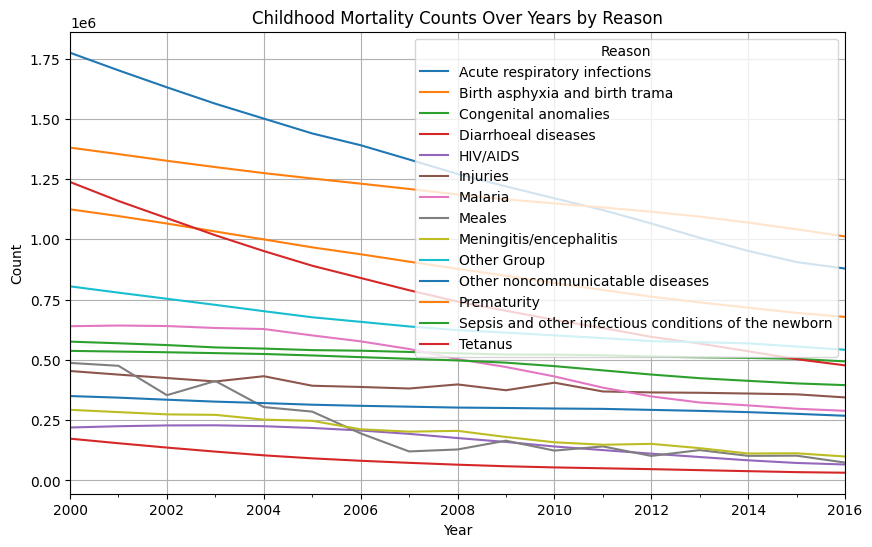

In [43]:
# Plotting
plt.figure(figsize=(10, 6))  # Set the figure size
pivot_table.plot(ax=plt.gca())  # Plot on the current axis
plt.title('Childhood Mortality Counts Over Years by Reason')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(True)
plt.legend(title='Reason')
plt.show()